In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation,metrics
from sklearn.grid_search import GridSearchCV
import socre
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
train = pd.read_csv('cleandata/train.csv')
test = pd.read_csv('cleandata/test.csv')
pre = pd.read_csv('cleandata/pre.csv')

testmondey = pre.iloc[:,0:2]
testmondey.columns = ['shopid','target']
# print testmondey
train = (pd.merge(train.reset_index(),testmondey,on='shopid')).set_index('shopid')

print train.shape
print test.shape
target = 'target'
IDcol = 'shopid'
# print type(train[1:1])
train[target] = train[target]/3000
for i in range(1,8):
    train['1-'+str(i)] = train['1-'+str(i)]/3000
    test['1-'+str(i)] = test['1-'+str(i)]/3000
for i in range(1,8):
    train['2-'+str(i)] = train['1-'+str(i)]/3000
    test['2-'+str(i)] = test['1-'+str(i)]/3000


(2000, 217)
(2000, 216)


In [6]:
testtarget = pre.iloc[:,[0,8]]
testtarget.columns = ['shopid','target']
test = (pd.merge(test.reset_index(),testtarget,on='shopid')).set_index('shopid')
test[target] = test[target]/3000
print test

        index       1-1       1-2       1-3       1-4       1-5       1-6  \
shopid                                                                      
1           0  0.084667  0.079667  0.076000  0.081333  0.088000  0.088000   
2           1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3           2  0.022667  0.021000  0.018667  0.023667  0.039667  0.032333   
4           3  0.028667  0.037667  0.023667  0.040333  0.055000  0.066667   
5           4  0.074333  0.072667  0.076667  0.065000  0.061667  0.070333   
6           5  0.027667  0.030333  0.030000  0.040333  0.037333  0.045667   
7           6  0.045333  0.031000  0.042667  0.046667  0.061000  0.069333   
8           7  0.027000  0.021000  0.021667  0.016333  0.034333  0.033667   
9           8  0.075000  0.067333  0.064000  0.065667  0.083667  0.094000   
10          9  0.036000  0.037000  0.024333  0.029667  0.025333  0.034333   
11         10  0.026333  0.028333  0.031667  0.037667  0.024000  0.019333   

In [7]:
def modelfit(alg,dtrain,dtest,predictors,useTrainCV=True,cv_folds=5,early_stopping_rounds=50):

    if(useTrainCV):
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values,label= (dtrain[target].values))
        cvresult = xgb.cv(xgb_param,xgtrain,num_boost_round=alg.get_params()['n_estimators'],nfold=cv_folds,metrics='auc',early_stopping_rounds=early_stopping_rounds)
        print cvresult.shape[0]
        alg.set_params(n_estimators = cvresult.shape[0])
    #fit on the data
    # print dtest[testvalues]
    print 'fitting now'
    print dtrain[predictors].shape
    print dtrain[target].shape
    alg.fit(dtrain[predictors],dtrain[target],eval_metric='auc')
    print 'fitting ok'
    #predict training set:
    return alg


In [9]:
list = []
list.append(target)
list.append(IDcol)
# for i in range(0,122):
#     list.append('city_'+str(i))
for i in range(0,44):
    list.append('cate3_'+str(i))
# print list
# for i in range(1,8):
#     list.append('1-'+str(i))
# for i in range(1,8):
#     list.append('2-'+str(i))
print list

predictors = [x for x in train.columns if x not in list]
print len(predictors)

['target', 'shopid', 'cate3_0', 'cate3_1', 'cate3_2', 'cate3_3', 'cate3_4', 'cate3_5', 'cate3_6', 'cate3_7', 'cate3_8', 'cate3_9', 'cate3_10', 'cate3_11', 'cate3_12', 'cate3_13', 'cate3_14', 'cate3_15', 'cate3_16', 'cate3_17', 'cate3_18', 'cate3_19', 'cate3_20', 'cate3_21', 'cate3_22', 'cate3_23', 'cate3_24', 'cate3_25', 'cate3_26', 'cate3_27', 'cate3_28', 'cate3_29', 'cate3_30', 'cate3_31', 'cate3_32', 'cate3_33', 'cate3_34', 'cate3_35', 'cate3_36', 'cate3_37', 'cate3_38', 'cate3_39', 'cate3_40', 'cate3_41', 'cate3_42', 'cate3_43']
172


In [10]:
xgb1 = XGBClassifier(

    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    scale_pos_weight=1,
    seed=27
)
alg = modelfit(xgb1,train,test,predictors)

317
fitting now
(2000, 172)
(2000,)
fitting ok


In [11]:
dtrain_predictions = alg.predict(train[predictors])

dtrain_predictions = dtrain_predictions * 3000
print dtrain_predictions
train[target] = train[target] * 3000
print train[target].values

# dtrain_predprob = alg.predict_proba(train[predictors])[:, 1]
# print the modelreport:

print '\ntrain Model Report'

# print "Accuracy: %.4g" %metrics.accuracy_score(dtrain[target].values, dtrain_predictions)
# print 'AUC SCORE(Train):%f' %metrics.roc_auc_score(dtrain[target].values,dtrain_predprob)

thescroe = socre.calculate_score(train[target].values, dtrain_predictions)
print thescroe


[ 209.    0.   59. ...,  226.  282.  157.]
[ 244.    0.   59. ...,  518.  285.  157.]

train Model Report
N: 2000 	T: 1 

0.046306088714


In [19]:
test[target] = test[target]/3000
print test[target]

shopid
1       255.0
2        82.0
3        80.0
4        90.0
5       302.0
6        97.0
7       128.0
8        70.0
9       210.0
10       77.0
11       91.0
12       35.0
13      290.0
14       60.0
15      134.0
16       38.0
17       89.0
18       74.0
19      148.0
20      164.0
21       67.0
22      110.0
23       33.0
24       83.0
25      119.0
26       49.0
27       83.0
28       64.0
29       81.0
30       36.0
        ...  
1971    236.0
1972     75.0
1973     48.0
1974    181.0
1975    180.0
1976     81.0
1977    136.0
1978    196.0
1979     49.0
1980     52.0
1981    104.0
1982     81.0
1983    118.0
1984     72.0
1985    450.0
1986     91.0
1987     47.0
1988    189.0
1989     63.0
1990     81.0
1991    150.0
1992     68.0
1993     57.0
1994    162.0
1995     52.0
1996     91.0
1997    276.0
1998    575.0
1999    309.0
2000    181.0
Name: target, dtype: float64


In [20]:

dtest_predictions = alg.predict(test[predictors])
print '\n test Model Report'
dtest_predictions = dtest_predictions * 3000
test[target] = test[target] 
print dtest_predictions
print test[target].values
thescroe = socre.calculate_score(test[target].values, dtest_predictions)
print thescroe


 test Model Report
[ 255.    0.   51. ...,  150.  224.  157.]
[ 255.   82.   80. ...,  575.  309.  181.]
N: 2000 	T: 1 

0.114416742346


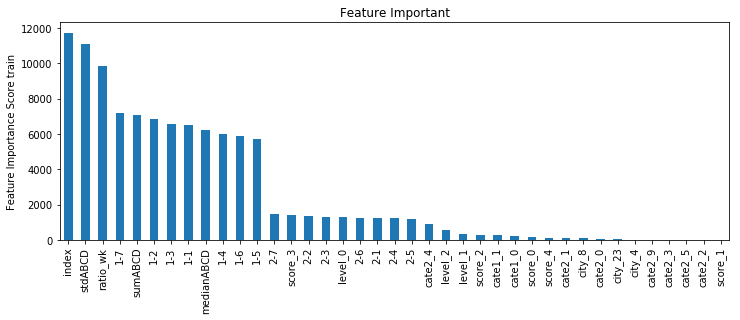

In [21]:
feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Important')
plt.ylabel('Feature Importance Score train')
plt.show()

